# Investment proposal for Spark Funds

`importing the needed libraries`

In [721]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
path_to_rounds2="C:/Users/e0368301/PGD/C1_StatisticsEssentials/Assignment/Downloads/rounds2.csv"
path_to_companies="C:/Users/e0368301/PGD/C1_StatisticsEssentials/Assignment/Downloads/companies.txt"

`Reading and investigation of rounds2 csv file`

In [722]:
rounds2 = pd.read_csv(path_to_rounds2, encoding= 'unicode_escape')

In [723]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [724]:
rounds2.shape

(114949, 6)

In [725]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


`Checking the NULL value percentage for each of the columns`

In [726]:
rounds2.describe()
round(100*(rounds2.isnull().sum()/len(rounds2.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

`Dropping the "funding_round_code" column as more than 70% of data not available and this parameter would not help much in our current analysis`

In [727]:
rounds2 = rounds2.drop('funding_round_code', axis=1)
round(100*(rounds2.isnull().sum()/len(rounds2.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

- "raised_amount_usd" is the variable which is expected to play a significant role in the analysis
- Hence It is not wise to impute any values to this based on assumptions

In [728]:
rounds2 = rounds2.dropna(subset=['raised_amount_usd'])
round(100*(rounds2.isnull().sum()/len(rounds2.index)), 2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [729]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


- Trying to understand the distribution of "raised_amount_usd"

In [730]:
print(rounds2['raised_amount_usd'].describe())
print(rounds2['raised_amount_usd'].quantile(0.95))
print(rounds2['raised_amount_usd'].quantile(0.96))
print(rounds2['raised_amount_usd'].quantile(0.97))
print(rounds2['raised_amount_usd'].quantile(0.98))
print(rounds2['raised_amount_usd'].quantile(0.99))
print(rounds2['raised_amount_usd'].quantile(1))

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64
33000000.0
40000000.0
50000000.0
66000000.0
111115455.89999953
21271935000.0


- Max value is 191 times the 99th percentile value, hence limiting the parameter at 99th percentile

In [731]:
rounds2 = rounds2[rounds2.raised_amount_usd <= np.percentile(rounds2.raised_amount_usd,99)]
print(round(100*(rounds2.isnull().sum()/len(rounds2.index)), 2))
print(rounds2['raised_amount_usd'].describe())
print(rounds2['raised_amount_usd'].quantile(0.95))
print(rounds2['raised_amount_usd'].quantile(0.96))
print(rounds2['raised_amount_usd'].quantile(0.97))
print(rounds2['raised_amount_usd'].quantile(0.98))
print(rounds2['raised_amount_usd'].quantile(0.99))
print(rounds2['raised_amount_usd'].quantile(1))
print(rounds2.info())

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64
count    9.400900e+04
mean     6.470120e+06
std      1.264568e+07
min      0.000000e+00
25%      3.100000e+05
50%      1.600000e+06
75%      6.700000e+06
max      1.110000e+08
Name: raised_amount_usd, dtype: float64
30000000.0
33000000.0
40000000.0
50000000.0
66959999.99999913
111000000.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 94009 entries, 0 to 114948
Data columns (total 5 columns):
company_permalink          94009 non-null object
funding_round_permalink    94009 non-null object
funding_round_type         94009 non-null object
funded_at                  94009 non-null object
raised_amount_usd          94009 non-null float64
dtypes: float64(1), object(4)
memory usage: 4.3+ MB
None


`Number of Unique entries based on all the columns of rounds2 dataframe`

In [732]:
rounds2.nunique()

company_permalink          73220
funding_round_permalink    94009
funding_round_type            14
funded_at                   4740
raised_amount_usd          21734
dtype: int64

`Converting the company_permalink column in rounds2 table to lower case
This is needed to match the letter cases between rounds2 table and companies table to avoid unwanted conflicts while merging`

In [733]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0


`Reading and investigation of "companies" file`

In [734]:
companies = pd.read_csv(path_to_companies, sep="\t", encoding = "ISO-8859-1")

In [735]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [736]:
companies.shape

(66368, 10)

In [737]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [738]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Cocone,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


`Dropping the unwanted columns to make the dataframe concise`

In [739]:
companies = companies.drop('homepage_url', axis=1)
companies = companies.drop('status', axis=1)
companies = companies.drop('state_code', axis=1)
companies = companies.drop('region', axis=1)
companies = companies.drop('city', axis=1)
companies = companies.drop('founded_at', axis=1)
companies.describe()

,permalink,name,category_list,country_code
count,66368,66367,63220,59410
unique,66368,66102,27296,137
top,/Organization/Cocone,Roost,Software,USA
freq,1,4,3995,37601


`Finding the percentage of NULL values for all the columns`

In [740]:
round(100*(companies.isnull().sum()/len(companies.index)), 2)

permalink         0.00
name              0.00
category_list     4.74
country_code     10.48
dtype: float64

`Removing the records which does not have "company code" and "category list"`

In [741]:
companies = companies.dropna(subset=['category_list'])
companies = companies.dropna(subset=['country_code'])
round(100*(companies.isnull().sum()/len(companies.index)), 2)

permalink        0.0
name             0.0
category_list    0.0
country_code     0.0
dtype: float64

`Finding the number of unique entries in companies dataframe for all the columns`

In [742]:
companies.nunique()

permalink        57804
name             57629
category_list    24727
country_code       137
dtype: int64

In [743]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57804 entries, 0 to 66366
Data columns (total 4 columns):
permalink        57804 non-null object
name             57803 non-null object
category_list    57804 non-null object
country_code     57804 non-null object
dtypes: object(4)
memory usage: 2.2+ MB


`Renaming and lowercasing the permalink(primary Key) column in companies df to match it with rounds2 df`

In [744]:
companies = companies.rename(columns={"permalink": "company_permalink"})
companies['company_permalink'] = companies['company_permalink'].str.lower()
companies.head()

,company_permalink,name,category_list,country_code
0,/organization/-fame,#fame,Media,IND
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/0-6-com,0-6.com,Curated Web,CHN
4,/organization/004-technologies,004 Technologies,Software,USA
5,/organization/01games-technology,01Games Technology,Games,HKG


#### Merging both the data frames
##### Left Merge is chosen here as per the requirement to add all the columns in companies df to rounds2 df

In [745]:
master_frame = pd.merge(rounds2, companies, how='left', on='company_permalink')

In [746]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94009 entries, 0 to 94008
Data columns (total 8 columns):
company_permalink          94009 non-null object
funding_round_permalink    94009 non-null object
funding_round_type         94009 non-null object
funded_at                  94009 non-null object
raised_amount_usd          94009 non-null float64
name                       87641 non-null object
category_list              87642 non-null object
country_code               87642 non-null object
dtypes: float64(1), object(7)
memory usage: 6.5+ MB


**Treating missing Values post merging both the df rounds2 and company**

In [747]:
master_frame.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
name                       6368
category_list              6367
country_code               6367
dtype: int64

`This implies the rounds2 df had around 6000 records of funding whose company details are not available in Companies df` <br>
`Removing the entries having NULL values for "category_list" and "country_code" and "name"`

In [748]:
# Finding the percentage of missing values for each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       6.77
category_list              6.77
country_code               6.77
dtype: float64

In [749]:
master_frame = master_frame.dropna(subset=['name'])
master_frame = master_frame.dropna(subset=['category_list'])
master_frame = master_frame.dropna(subset=['country_code'])
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
country_code               0.0
dtype: float64

In [750]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87641 entries, 0 to 94007
Data columns (total 8 columns):
company_permalink          87641 non-null object
funding_round_permalink    87641 non-null object
funding_round_type         87641 non-null object
funded_at                  87641 non-null object
raised_amount_usd          87641 non-null float64
name                       87641 non-null object
category_list              87641 non-null object
country_code               87641 non-null object
dtypes: float64(1), object(7)
memory usage: 6.0+ MB


__With this, checkpoint 1 is concluded, summary of activities done are listed below__
1. rounds2 file read into df, missing value and outlier treatment done
2. companies file read into df, missing value treatement done
3. Companies df merged to rounds2 df
4. Treatment of missing values done
#### CHECKPOINT 1 Done

In [751]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,IND
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,CHN
4,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,01Games Technology,Games,HKG
5,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN


### CHECKPOINT 2 Begins

`Plotting the distribution of "raised_amount_usd" to visualise the distribution for the desired fund type`

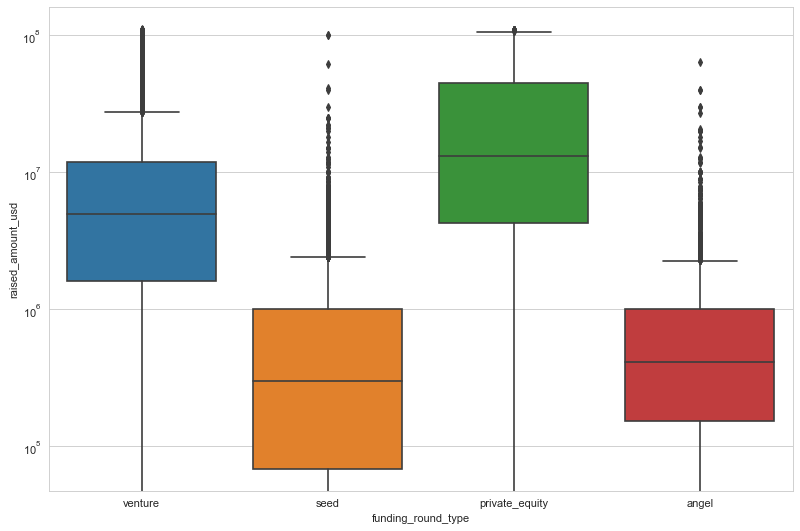

In [752]:
master_subset = master_frame.loc[master_frame["funding_round_type"].isin(["seed", "angel", "venture", "private_equity"])]
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_subset)
plt.yscale('log')
plt.show()

__Mean and Median are calculated for all the 4 desired funding types__

In [753]:
print(master_frame.loc[master_frame['funding_round_type'] == "seed"]['raised_amount_usd'].describe())
seed_mean = master_frame.loc[master_frame['funding_round_type'] == "seed"]['raised_amount_usd'].mean()
seed_median = master_frame.loc[master_frame['funding_round_type'] == "seed"]['raised_amount_usd'].median()
print("Seed Mean:",seed_mean)
print("Seed Median:",seed_median)

count    2.109200e+04
mean     7.322531e+05
std      1.600747e+06
min      0.000000e+00
25%      6.882775e+04
50%      3.000000e+05
75%      1.000000e+06
max      1.000000e+08
Name: raised_amount_usd, dtype: float64
Seed Mean: 732253.116442253
Seed Median: 300000.0


In [754]:
print(master_frame.loc[master_frame['funding_round_type'] == "angel"]['raised_amount_usd'].describe())
angel_mean=master_frame.loc[master_frame['funding_round_type'] == "angel"]['raised_amount_usd'].mean()
angel_median=master_frame.loc[master_frame['funding_round_type'] == "angel"]['raised_amount_usd'].median()
print("Angel Mean:",angel_mean)
print("Angel Median:",angel_median)

count    4.399000e+03
mean     8.593801e+05
std      2.018470e+06
min      0.000000e+00
25%      1.526710e+05
50%      4.148120e+05
75%      1.000000e+06
max      6.359026e+07
Name: raised_amount_usd, dtype: float64
Angel Mean: 859380.1157081155
Angel Median: 414812.0


In [755]:
print(master_frame.loc[master_frame['funding_round_type'] == "venture"]['raised_amount_usd'].describe())
venture_mean=master_frame.loc[master_frame['funding_round_type'] == "venture"]['raised_amount_usd'].mean()
venture_median=master_frame.loc[master_frame['funding_round_type'] == "venture"]['raised_amount_usd'].median()
print("Venture Mean:",venture_mean)
print("Venture Median:",venture_median)

count    4.748100e+04
mean     9.582695e+06
std      1.345863e+07
min      0.000000e+00
25%      1.600000e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.104880e+08
Name: raised_amount_usd, dtype: float64
Venture Mean: 9582694.504665025
Venture Median: 5000000.0


In [756]:
print(master_frame.loc[master_frame['funding_round_type'] == "private_equity"]['raised_amount_usd'].describe())
private_equity_mean=master_frame.loc[master_frame['funding_round_type'] == "private_equity"]['raised_amount_usd'].mean()
private_equity_median=master_frame.loc[master_frame['funding_round_type'] == "private_equity"]['raised_amount_usd'].median()
print("Private Equity Mean:",private_equity_mean)
print("Private Equity Median:",private_equity_median)

count    1.538000e+03
mean     2.769929e+07
std      3.101441e+07
min      0.000000e+00
25%      4.300000e+06
50%      1.310991e+07
75%      4.500000e+07
max      1.101000e+08
Name: raised_amount_usd, dtype: float64
Private Equity Mean: 27699294.483745124
Private Equity Median: 13109906.0


__Best suited investment type for Spark Funds would be Venture funding since the Mean and the Median of Venture Funding lies in the range of 5 and 15 Million USD__

__With this CheckPoint 2 is done, summary is below__
1. Mean and Median has been calculated for all the 4 desired fund types
2. _It was found that Venture Funding is the suitable one for Spark Funds as the mean of the Venture funding alone lies in the required range. Median also indicates this would be the best fund given the Business Constraint_ 

#### CheckPoint 2 Done

#### CheckPoint 3 Begins

`For the chosen funding type, "Venture Funding", group the df by country code`

In [757]:
venture_funded_countries = master_frame.loc[(master_frame.funding_round_type == 'venture')].groupby(['country_code'])
venture_funded_countries

In [758]:
venture_funded_countries['company_permalink'].describe()

,count,unique,top,freq
country_code,,,,
ARE,26,20,/organization/chipin,3
ARG,58,39,/organization/trefoil-energy,4
ARM,2,1,/organization/be2,2
AUS,205,160,/organization/protagonist-therapeutics,4
AUT,50,37,/organization/miracor-medical-systems,3
BAH,1,1,/organization/okyanos-heart-institute,1
BEL,141,100,/organization/amplidata,6
BGD,2,2,/organization/t-zone,1
BGR,2,2,/organization/eurocapital-bitex,1


`Sorting the Venture funded countries based on Investment amount`

In [759]:
top9_venture_funded_countries=venture_funded_countries['raised_amount_usd'].sum().sort_values(ascending=False).reset_index()

`Retaining the top 9 and removing the rest`

In [760]:
top9_venture_funded_countries=top9_venture_funded_countries.iloc[0:9]

In [761]:
top9_venture_funded_countries

,country_code,raised_amount_usd
0,USA,3.437622e+11
1,CHN,2.477892e+10
2,GBR,1.754107e+10
3,IND,9.990809e+09
4,CAN,9.317218e+09
5,ISR,6.704350e+09
6,FRA,6.255329e+09
7,DEU,5.893145e+09
8,CHE,2.801560e+09


In [762]:
type(top9_venture_funded_countries)

pandas.core.frame.DataFrame

_Next task is to find from the wiki source, the english speaking nations_ <br>
___Assumption made for this task:___ <br>
1. A country is considered English Speaking ___only if___ English is ___de facto or de facto and de jure official language___ in that country
2. ___All___ the countries listed in ___de facto table___ and ___de facto and de jure official language___ are considered English speaking countries

#### Scrape the Wiki page for finding the English speaking countries

In [763]:
import requests, bs4
url = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

response = requests.get(url, headers=headers)
soup = bs4.BeautifulSoup(response.text, "html.parser")

Below segment extracts the country code from the first two tables in the given wiki with the assumptions listed above <br>
`Expected Output:` <br>
___List of English speaking Nations from Wiki source___

In [764]:
tables = soup.find_all('table', class_='sortable')
countries_list = []
table_count = 0
for table in tables:
    table_count = table_count + 1
    for td in table.findChildren('td'):
        token = td.text
        token = token.strip()
        # Country code is all upper case and the length is 3 characters
        if(token.isupper() and len(token) == 3):
            countries_list.append(token)
    # Stopping after the first 2 tables
    # As only the first two tables provides the countries with English as Official Language
    if table_count == 2:
        break
print("Below are the country codes of English Speaking countries")
print((countries_list))
print(len(countries_list))

Below are the country codes of English Speaking countries
['AUS', 'NZL', 'GBR', 'USA', 'ATG', 'BHS', 'BRB', 'BLZ', 'BWA', 'BDI', 'CMR', 'CAN', 'COK', 'DMA', 'SWZ', 'FJI', 'GMB', 'GHA', 'GRD', 'GUY', 'IND', 'IRL', 'JAM', 'KEN', 'KIR', 'LSO', 'LBR', 'MWI', 'MLT', 'MHL', 'MUS', 'FSM', 'NAM', 'NRU', 'NGA', 'NIU', 'PAK', 'PLW', 'PNG', 'PHL', 'RWA', 'KNA', 'LCA', 'VCT', 'WSM', 'SYC', 'SLE', 'SGP', 'SLB', 'ZAF', 'SSD', 'SDN', 'TZA', 'TON', 'TTO', 'TUV', 'UGA', 'VUT', 'ZMB', 'ZWE']
60


`Top 3 English speaking countries identified from top 9 with the help of English speaking countries discovered above`

In [765]:
top3_english_speaking_venture_funded_countries = []
for i in range(len(top9_venture_funded_countries)):
    if top9_venture_funded_countries.iloc[i][0] in countries_list:
        top3_english_speaking_venture_funded_countries.append(top9_venture_funded_countries.country_code.iloc[i])
top3_english_speaking_venture_funded_countries=top3_english_speaking_venture_funded_countries[0:3]
print("Below are the top 3 English speaking countries")
top3_english_speaking_venture_funded_countries

Below are the top 3 English speaking countries


['USA', 'GBR', 'IND']

### Top 3 Engligh speaking countries in the descending order of total investments made are
#### 1. USA United States of America
#### 2. GBR United Kingdom
#### 3. IND India

#### CheckPoint 3 ends
#### CheckPoint 4 Begins
##### Sector Analysis

`Reading sector_mapping data into a dataframe and a basic look at the data set`

In [766]:
path_to_sector_mapping="C:/Users/e0368301/PGD/C1_StatisticsEssentials/Assignment/Downloads/mapping.csv"
sector_mapping = pd.read_csv(path_to_sector_mapping, encoding= 'unicode_escape')
sector_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [767]:
sector_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


- The category list content is found to be not correct <br>
- 'na' has been replaced with '0' <br>
- This is corrected to replace '0' with 'na' and converted to lower case so that no mismatch occurs while merging <br>
- Main sectors are extraced from sector_mapping df and parameters are renamed to reflect the actual property

In [768]:
# Replacing '0' to 'na'
sector_mapping["category_list"] = sector_mapping["category_list"].str.replace('0', 'na').str.lower()
sector_mapping = pd.melt(sector_mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
sector_mapping = sector_mapping[~(sector_mapping.value == 0)]
sector_mapping = sector_mapping.drop('value', axis = 1)
sector_mapping = sector_mapping.rename(columns = {"variable":"main_sectors", "category_list":"primary_sector"})

In [769]:
print(sector_mapping.nunique())
print(sector_mapping.isnull().sum())

primary_sector    687
main_sectors        8
dtype: int64
primary_sector    0
main_sectors      0
dtype: int64


- ___'category_list' will be considered from master frame to map with sectors df <br>___
- ___Incase more categories are found seperated by |, first category is considered as the primary category for that company___

In [770]:
master_frame["primary_sector"] = master_frame["category_list"].str.split("|").str[0].str.lower()
master_frame.nunique()

company_permalink          48396
funding_round_permalink    87641
funding_round_type            14
funded_at                   4639
raised_amount_usd          20349
name                       48267
category_list              21209
country_code                 132
primary_sector               706
dtype: int64

`Inner Merging the master_frame and sector_mapping on primary_sector`

In [771]:
final_merged_frame = pd.merge(master_frame, sector_mapping, how='inner', on='primary_sector')

In [772]:
final_merged_frame.nunique()

company_permalink          48338
funding_round_permalink    87562
funding_round_type            14
funded_at                   4639
raised_amount_usd          20330
name                       48209
category_list              21153
country_code                 132
primary_sector               671
main_sectors                   8
dtype: int64

- ___Above is the merged final frame where for each entry, primary sectors are mapped to main sectors <br>___
- ___Primary sector is presented as a seperate column___

##### Checkpoint 4 ends

##### CheckPoint 5 starts
Identified top 3 countries are ___USA, GBR, IND___ <br>
Seperate data frames are created for each of those countries with the following conditions
1. ___Funding type is Venture___
2. ___Funding range is 5 million to 15 million USD___
3. ___All the columns of master_frame are present in each of these data frames___

Note: Total count of investments and total amount invested for each main sectors are not part of master frame. This shall be calculated for each country and for each main sector in the respective country's df

`Analysis for First top country - USA`

In [773]:
d1=final_merged_frame.loc[(final_merged_frame.country_code == top3_english_speaking_venture_funded_countries[0]) & (final_merged_frame.funding_round_type == 'venture') & (final_merged_frame.raised_amount_usd >= 5000000) & (final_merged_frame.raised_amount_usd <= 15000000)]
d1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,country_code,primary_sector,main_sectors
7,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,Media,USA,media,Entertainment
31,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,ChefsFeed,Media|Mobile|Restaurants|Technology,USA,media,Entertainment
61,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,The Huffington Post,Media|News|Publishing,USA,media,Entertainment
62,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,The Huffington Post,Media|News|Publishing,USA,media,Entertainment
85,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,MatchMine,Media|News|Reviews and Recommendations,USA,media,Entertainment


___Total Count of investments and total amount of investment for each main sectors calculated and appended as columns___
1. To do the above, "d1" data frame is grouped by main sectors and count on the group performed and appended as columns, this new data frame is then merged with d1 data frame
2. Same has been carried out for total amount of investment as well

##### Finally 2 new columns have been added, total count of investments and total amount of investment grouped by main sectors
Companies have the same main sector mapping will have the same values for above two new parameters

In [774]:
main_sectors_count=d1.groupby(['main_sectors'])['company_permalink'].count().to_frame().reset_index()
main_sectors_count.rename(columns={'company_permalink' : 'count_of_investments'}, inplace=True)
d1=pd.merge(d1, main_sectors_count, how='inner',on='main_sectors')
main_sectors_total_amount_invested=d1.groupby(['main_sectors'])['raised_amount_usd'].sum().to_frame().reset_index()
main_sectors_total_amount_invested.rename(columns={'raised_amount_usd' : 'total_investment_amount'}, inplace=True)
d1=pd.merge(d1, main_sectors_total_amount_invested, how='inner',on='main_sectors')
d1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,country_code,primary_sector,main_sectors,count_of_investments,total_investment_amount
0,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,Media,USA,media,Entertainment,591,5.099198e+09
1,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,ChefsFeed,Media|Mobile|Restaurants|Technology,USA,media,Entertainment,591,5.099198e+09
2,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,The Huffington Post,Media|News|Publishing,USA,media,Entertainment,591,5.099198e+09
3,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,The Huffington Post,Media|News|Publishing,USA,media,Entertainment,591,5.099198e+09
4,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,MatchMine,Media|News|Reviews and Recommendations,USA,media,Entertainment,591,5.099198e+09


- ___Summing up the total investments made for each main sector___ <br>
- ___Output of the below will list the top 3 sectors based on investment amount for USA___ <br>

In [775]:
d1.groupby(['main_sectors'])['raised_amount_usd'].sum().sort_values(ascending=False)

main_sectors
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.163343e+10
News, Search and Messaging                 1.397157e+10
Health                                     8.211859e+09
Manufacturing                              7.258553e+09
Entertainment                              5.099198e+09
Automotive & Sports                        1.454104e+09
Name: raised_amount_usd, dtype: float64

In [776]:
# Total amount invested across sectors in USA
print("Total amount invested in USA across main sectors")
d1['raised_amount_usd'].sum()

Total amount invested in USA across main sectors


107757097294.0

In [777]:
#Grouping based on Count of investments
d1_sectors_in_count_order=d1.groupby(['main_sectors'])['count_of_investments'].count().sort_values(ascending=False).to_frame().reset_index()
d1_sectors_in_count_order

,main_sectors,count_of_investments
0,Others,2950
1,"Social, Finance, Analytics, Advertising",2714
2,Cleantech / Semiconductors,2350
3,"News, Search and Messaging",1583
4,Health,909
5,Manufacturing,799
6,Entertainment,591
7,Automotive & Sports,167


In [778]:
print("Total Count of investments in USA across main sectors")
d1.groupby(['main_sectors'])['count_of_investments'].count().sum()

Total Count of investments in USA across main sectors


12063

___To find the countries received highest amount of investment, following steps are performed___
1. d1 df is filtered by top dector of C1, USA.
2. It is grouped by name and investment amount is summed up for each company to find the company which has received the highest imvestment amount
3. This is done because there are companies which have received multiple rounds of investments

___Same step would be followed for other countries as well___

In [779]:
print("Company received highest investment in the top sector count wise")
d1.loc[d1['main_sectors'] == d1_sectors_in_count_order['main_sectors'].values[0]].groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending=False).to_frame().reset_index()['name'].values[0]

Company received highest investment in the top sector count wise


'Virtustream'

In [780]:
print("Company received highest investment in the second top sector count wise")
d1.loc[d1['main_sectors'] == d1_sectors_in_count_order['main_sectors'].values[1]].groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending=False).to_frame().reset_index()['name'].values[0]

Company received highest investment in the second top sector count wise


'SST Inc. (Formerly ShotSpotter)'

__Same procedure mentioned for USA is being carried out for GBR__

In [781]:
d2=final_merged_frame.loc[(final_merged_frame.country_code == top3_english_speaking_venture_funded_countries[1]) & (final_merged_frame.funding_round_type == 'venture') & (final_merged_frame.raised_amount_usd >= 5000000) & (final_merged_frame.raised_amount_usd <= 15000000)]
d2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,country_code,primary_sector,main_sectors
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,media,Entertainment
224,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,09-07-2014,10000000.0,Common Interest Communities,Application Platforms|Internet|Software|Startups,GBR,application platforms,"News, Search and Messaging"
256,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,01-10-2014,5460000.0,GeoSpock Ltd.,Application Platforms|Databases|Real Time,GBR,application platforms,"News, Search and Messaging"
257,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,05-10-2015,5400000.0,GeoSpock Ltd.,Application Platforms|Databases|Real Time,GBR,application platforms,"News, Search and Messaging"


In [782]:
main_sectors_count=d2.groupby(['main_sectors'])['company_permalink'].count().to_frame().reset_index()
main_sectors_count.rename(columns={'company_permalink' : 'count_of_investments'}, inplace=True)
d2=pd.merge(d2, main_sectors_count, how='inner',on='main_sectors')
main_sectors_total_amount_invested=d2.groupby(['main_sectors'])['raised_amount_usd'].sum().to_frame().reset_index()
main_sectors_total_amount_invested.rename(columns={'raised_amount_usd' : 'total_investment_amount'}, inplace=True)
d2=pd.merge(d2, main_sectors_total_amount_invested, how='inner',on='main_sectors')
d2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,country_code,primary_sector,main_sectors,count_of_investments,total_investment_amount
0,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,media,Entertainment,56,482784687.0
1,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,media,Entertainment,56,482784687.0
2,/organization/eutechnyx,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,13-05-2010,8800000.0,Eutechnyx,Games,GBR,games,Entertainment,56,482784687.0
3,/organization/mind-candy,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,01-06-2011,10000000.0,Mind Candy,Games,GBR,games,Entertainment,56,482784687.0
4,/organization/mind-candy,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,23-11-2006,10860000.0,Mind Candy,Games,GBR,games,Entertainment,56,482784687.0


- ___Summing up the total investments made for each main sector___ <br>
- ___Output of the below will list the top 3 sectors based on investment amount for GBR___ <br>

In [783]:
d2.groupby(['main_sectors'])['raised_amount_usd'].sum().sort_values(ascending=False)

main_sectors
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.163990e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08
Automotive & Sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64

In [784]:
print("Total amount invested in GBR across main sectors")
d2['raised_amount_usd'].sum()

Total amount invested in GBR across main sectors


5379078691.0

In [785]:
#Grouping based on Count of investments
d2_sectors_in_count_order=d2.groupby(['main_sectors'])['count_of_investments'].count().sort_values(ascending=False).to_frame().reset_index()
d2_sectors_in_count_order

,main_sectors,count_of_investments
0,Others,147
1,"Social, Finance, Analytics, Advertising",133
2,Cleantech / Semiconductors,130
3,"News, Search and Messaging",73
4,Entertainment,56
5,Manufacturing,42
6,Health,24
7,Automotive & Sports,16


In [786]:
print("Total Count of investments in GBR across main sectors")
d2.groupby(['main_sectors'])['count_of_investments'].count().sum()

Total Count of investments in GBR across main sectors


621

In [787]:
print("Company received highest investment in the top sector count wise")
d2.loc[d2['main_sectors'] == d2_sectors_in_count_order['main_sectors'].values[0]].groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending=False).to_frame().reset_index()['name'].values[0]

Company received highest investment in the top sector count wise


'Electric Cloud'

In [788]:
print("Company received highest investment in the second top sector count wise")
d2.loc[d2['main_sectors'] == d2_sectors_in_count_order['main_sectors'].values[1]].groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending=False).to_frame().reset_index()['name'].values[0]

Company received highest investment in the second top sector count wise


'Celltick Technologies'

___Same Procedure as the above two countries are being carried out for India as well___

In [789]:
d3=final_merged_frame.loc[(final_merged_frame.country_code == top3_english_speaking_venture_funded_countries[2]) & (final_merged_frame.funding_round_type == 'venture') & (final_merged_frame.raised_amount_usd >= 5000000) & (final_merged_frame.raised_amount_usd <= 15000000)]
d3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,country_code,primary_sector,main_sectors
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,IND,media,Entertainment
545,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,28-04-2015,10000000.0,Babajob,Curated Web|Information Technology|Services|St...,IND,curated web,"News, Search and Messaging"
588,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,05-02-2008,11750000.0,Bharat Matrimony,Curated Web|Match-Making,IND,curated web,"News, Search and Messaging"
635,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,24-01-2012,5000000.0,Bluestone.com,Curated Web,IND,curated web,"News, Search and Messaging"
637,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,18-03-2014,10000000.0,Bluestone.com,Curated Web,IND,curated web,"News, Search and Messaging"


In [790]:
main_sectors_count=d3.groupby(['main_sectors'])['company_permalink'].count().to_frame().reset_index()
main_sectors_count.rename(columns={'company_permalink' : 'count_of_investments'}, inplace=True)
d3=pd.merge(d3, main_sectors_count, how='inner',on='main_sectors')
main_sectors_total_amount_invested=d3.groupby(['main_sectors'])['raised_amount_usd'].sum().to_frame().reset_index()
main_sectors_total_amount_invested.rename(columns={'raised_amount_usd' : 'total_investment_amount'}, inplace=True)
d3=pd.merge(d3, main_sectors_total_amount_invested, how='inner',on='main_sectors')
d3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,country_code,primary_sector,main_sectors,count_of_investments,total_investment_amount
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,IND,media,Entertainment,33,280830000.0
1,/organization/dhruva,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,27-11-2006,5000000.0,Dhruva,Games,IND,games,Entertainment,33,280830000.0
2,/organization/games2win,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,29-03-2007,5000000.0,Games2Win,Games,IND,games,Entertainment,33,280830000.0
3,/organization/games2win,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,30-03-2011,6000000.0,Games2Win,Games,IND,games,Entertainment,33,280830000.0
4,/organization/pokkt,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,03-11-2015,5000000.0,POKKT,Games,IND,games,Entertainment,33,280830000.0


- ___Summing up the total investments made for each main sector___ <br>
- ___Output of the below will list the top 3 sectors based on investment amount for India___ <br>

In [791]:
d3.groupby(['main_sectors'])['raised_amount_usd'].sum().sort_values(ascending=False)

main_sectors
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.505496e+08
News, Search and Messaging                 4.338345e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Health                                     1.677400e+08
Cleantech / Semiconductors                 1.653800e+08
Automotive & Sports                        1.369000e+08
Name: raised_amount_usd, dtype: float64

In [792]:
print("Total amount invested in India across main sectors")
d3['raised_amount_usd'].sum()

Total amount invested in India across main sectors


2949543602.0

In [793]:
#Grouping based on Count of investments
d3_sectors_in_count_order=d3.groupby(['main_sectors'])['count_of_investments'].count().sort_values(ascending=False).to_frame().reset_index()
d3_sectors_in_count_order

,main_sectors,count_of_investments
0,Others,110
1,"Social, Finance, Analytics, Advertising",60
2,"News, Search and Messaging",52
3,Entertainment,33
4,Manufacturing,21
5,Cleantech / Semiconductors,20
6,Health,19
7,Automotive & Sports,13


In [794]:
print("Total Count of investments in India across main sectors")
d3.groupby(['main_sectors'])['count_of_investments'].count().sum()

Total Count of investments in India across main sectors


328

In [795]:
print("Company received highest investment in the top sector count wise")
d3.loc[d3['main_sectors'] == d3_sectors_in_count_order['main_sectors'].values[0]].groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending=False).to_frame().reset_index()['name'].values[0]

Company received highest investment in the top sector count wise


'FirstCry.com'

In [796]:
print("Company received highest investment in the second top sector count wise")
d3.loc[d3['main_sectors'] == d3_sectors_in_count_order['main_sectors'].values[1]].groupby(['name'])['raised_amount_usd'].sum().sort_values(ascending=False).to_frame().reset_index()['name'].values[0]

Company received highest investment in the second top sector count wise


'Manthan Systems'

#### Summary of Results
Questions|USA|GBR|India
-|-|-|-
1. Total number of investments (count)|12063|621|328
2. Total amount of investment (USD)|107757097294|5379078691|2949543602
3. Top sector (based on count of investments)|Others|Others|Others
4. Second-best sector (based on count of investments)|Social, Finance, Analytics, Advertising|Social, Finance, Analytics, Advertising|Social, Finance, Analytics, Advertising
5. Third-best sector (based on count of investments)|Cleantech / Semiconductors|Cleantech / Semiconductors|News, Search and Messaging
6. Number of investments in the top sector|2950|147|110
7. Number of investments in the second-best sector|2714|133|60
8. Number of investments in the third-best sector|2350|130|52
9. For the top sector count-wise (point 3), which company received the highest investment?|Virtustream|Electric Cloud|FirstCry.com
10. For the second-best sector count-wise (point 4), which company received the highest investment?|SST Inc. (Formerly ShotSpotter)|Celltick Technologies|Manthan Systems

### CheckPoint 5 ends
### Checkpoint 6 starts

### Plot 1
___Requirement is to find the fraction of count of total investments for the four intrested funding types, "seed", "angel", "venture" and "private_equity" along with their respective mean___<br><br>
___Steps followed for plotting Plot 1___
1. Create a df containing the count of all the types of investments
2. Add a column in the above dataframe containing the mean value for investments in the respective funding types
3. Restrict the above data frame to contain only the four interested funding type, seed, angel, venture and private equity
4. Plot a bar graph where in the two sub plots, fraction of count of total investment and mean investment amounts are plotted respectively 

In [797]:
final_merged_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,country_code,primary_sector,main_sectors
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,IND,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,media,Entertainment
4,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,26-03-2014,1090000.0,A Dance for Me,Media|News|Photo Sharing|Video,USA,media,Entertainment


In [798]:
sum_of_count_of_investments = final_merged_frame.groupby(final_merged_frame['funding_round_type'])['funding_round_permalink'].count().sum()
100*(final_merged_frame.groupby(final_merged_frame['funding_round_type'])['funding_round_permalink'].count()/sum_of_count_of_investments)

funding_round_type
angel                     5.015874
convertible_note          1.505219
debt_financing            7.264567
equity_crowdfunding       1.280236
grant                     2.197300
non_equity_assistance     0.068523
post_ipo_debt             0.138188
post_ipo_equity           0.605285
private_equity            1.755328
product_crowdfunding      0.374592
secondary_market          0.026267
seed                     24.057239
undisclosed               1.507503
venture                  54.203878
Name: funding_round_permalink, dtype: float64

In [799]:
plot1=(100*(final_merged_frame.groupby(final_merged_frame['funding_round_type'])['funding_round_permalink'].count()/sum_of_count_of_investments)).to_frame()
plot1['average']=final_merged_frame.groupby(final_merged_frame['funding_round_type'])['raised_amount_usd'].mean()
plot1=plot1.reset_index()
plot1=plot1.rename(columns={'funding_round_permalink':'fraction_of_investments', 'average' : 'average_investment'})
plot1=plot1.loc[plot1.funding_round_type.isin(['seed','angel','venture','private_equity'])]
#Converting the average to Millions
plot1['average_investment']=plot1['average_investment']/1000000
plot1

,funding_round_type,fraction_of_investments,average_investment
0,angel,5.015874,0.860331
8,private_equity,1.755328,27.717113
11,seed,24.057239,0.732272
13,venture,54.203878,9.583916


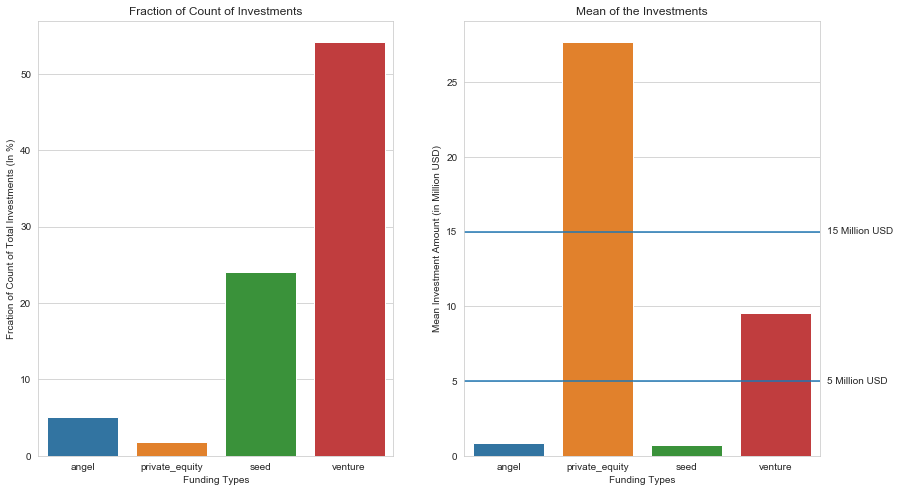

In [800]:
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='fraction_of_investments', data=plot1).set_title("Fraction of Count of Investments")
plt.xlabel("Funding Types")
plt.ylabel("Frcation of Count of Total Investments (In %)")

ax=plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='average_investment', data=plot1).set_title("Mean of the Investments")
plt.xlabel("Funding Types")
plt.ylabel("Mean Investment Amount (in Million USD)")
ax.axhline(5)
ax.text(1.02, 5, "5 Million USD", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_yaxis_transform())
ax.axhline(15)
ax.text(1.02, 15, "15 Million USD", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_yaxis_transform())
plt.show()

Following inference made from above Plots
1. Venture funding received the highest count of investments, or Venture funding is the most preferred funding type
2. Venture funding mean investment amount lies within the range of Spark Investment amount criteria, ie between 5 to 15 million USD <br><br>
___From the above points, Venture funding is the best suited for Spark Funds___

### Plot 2
___Requirement for plot 2 is have a plot showing the top 9 countries against the total amount of investments of funding type "venture"___ <br>
___Steps followed___ <br>
1. top9_venture_funded_countries df created earlier is used for this plot
3. Plot a bar graph for the countries and the amount invested in those countries

In [801]:
# Top 9 countried along with the total amount of investments already stored in "top9_venture_funded_countries" df
top9_venture_funded_countries

,country_code,raised_amount_usd
0,USA,3.437622e+11
1,CHN,2.477892e+10
2,GBR,1.754107e+10
3,IND,9.990809e+09
4,CAN,9.317218e+09
5,ISR,6.704350e+09
6,FRA,6.255329e+09
7,DEU,5.893145e+09
8,CHE,2.801560e+09


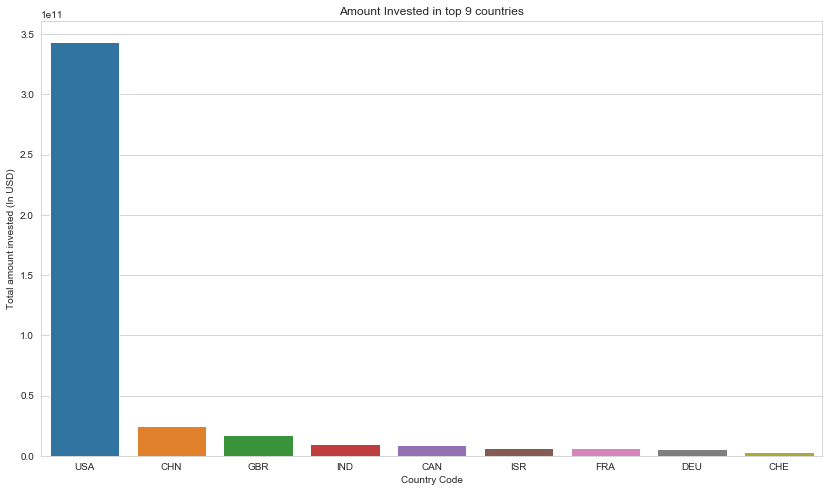

In [802]:
plt.figure(figsize=(14, 8))
sns.barplot(x='country_code', y='raised_amount_usd', data=top9_venture_funded_countries).set_title("Amount Invested in top 9 countries")
plt.xlabel("Country Code")
plt.ylabel("Total amount invested (In USD)")
plt.show()

___From Plot 2, following inference could be made___
1. USA is clearly the most heavily invested country in venture funding
2. Since China is not an english speaking nation, it is not considered in the analysis
3. GBR and India are the 2nd and 3rd countries respectively considering those are English Speaking countries

### Plot 3
___Requirement: A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart for Venture funding___ <br>
___Steps followed:___
1. DFs of the 3 countries created above are concatenated (in order to have the total count and total amount of investment parameters)
2. DF is already restricted to have only venture type data since the respective country Dataframes contain only venture data
3. DF will be restricted to have data only for the top 3 sectors of top 3 countries respectively

In [803]:
top_sectors=['Cleantech / Semiconductors','Social, Finance, Analytics, Advertising','Others','News, Search and Messaging']
plot3=pd.concat([d1,d2,d3])
plot3=plot3.loc[(plot3.main_sectors.isin(top_sectors))]
plot3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,country_code,primary_sector,main_sectors,count_of_investments,total_investment_amount
591,/organization/aarohi-communication,/funding-round/84f519482b29b686a0c6b59ff383d386,venture,29-08-2003,6000000.0,Aarohi communication,Application Platforms|Communications Infrastru...,USA,application platforms,"News, Search and Messaging",1583,1.397157e+10
592,/organization/aarohi-communication,/funding-round/b0f47948e427b6c91a50128373273abf,venture,06-12-2002,8000000.0,Aarohi communication,Application Platforms|Communications Infrastru...,USA,application platforms,"News, Search and Messaging",1583,1.397157e+10
593,/organization/appian,/funding-round/95e11461d907939a880034263533be1e,venture,21-07-2008,10000000.0,Appian,Application Platforms|Business Productivity|Cl...,USA,application platforms,"News, Search and Messaging",1583,1.397157e+10
594,/organization/appilog,/funding-round/41185e964879edbec6b7f1edc8f2ed4f,venture,15-01-2004,9000000.0,Appilog,Application Platforms|Internet|Software,USA,application platforms,"News, Search and Messaging",1583,1.397157e+10
595,/organization/appilog,/funding-round/c85c0a984ded486d0105d171070accf7,venture,24-06-2003,6500000.0,Appilog,Application Platforms|Internet|Software,USA,application platforms,"News, Search and Messaging",1583,1.397157e+10


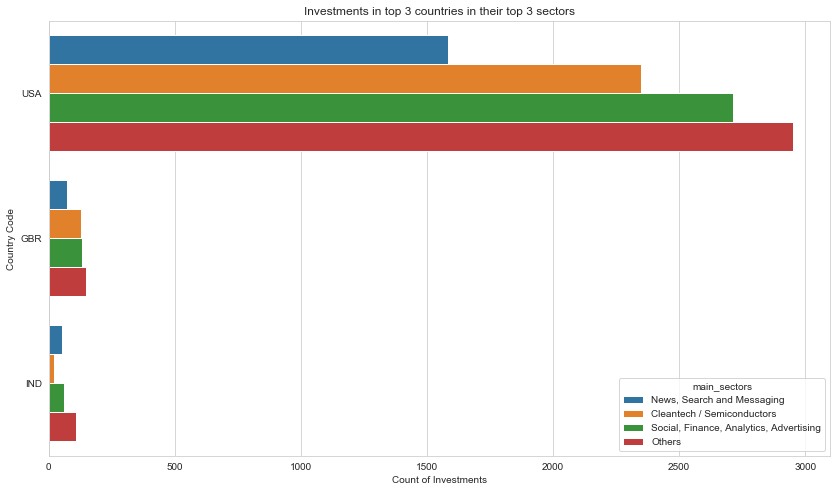

In [804]:
plt.figure(figsize=(14, 8))
sns.barplot(x='count_of_investments', y='country_code', hue='main_sectors', data=plot3).set_title("Investments in top 3 countries in their top 3 sectors")
plt.xlabel("Count of Investments")
plt.ylabel("Country Code")
plt.show()

___From Plot 3, following inference could be made___
1. Top 3 sectors for all top 3 countries are captured
3. In the top 3 countries identified, the top 3 sectors are "Cleantech / Semicondictors", "Social, Finance, Analytics, Advertising", "Others" and "News, Search and Messaging"

### Inference
##### 1. The best suited fund type for Spark Funds is "Venture Funding"
##### 2. Top 3 English speaking nations where majority of the investments happening in Venture Type are USA, Great Britain and India
##### 3. Top 3 sectors in the identified top 3 countries are "Cleantech / Semiconductors", "Social, Finance, Analytics, Advertising" and "Others" and "News, Search and Messaging". These are the sectors where maximum investments have happened 

## Proposal (Based on the strategy of where most investments are happening)
#### Proposed type of Funding: ___Venture Funding___
#### Proposed Countries for investment based on the trend:
- ___USA___
- ___Great Britain___
- ___India___

#### Proposed Sectors for investment based on the trend:
- ___Others___
- ___Social, Finance, Analytics, Advertising___
- ___Cleantech / Semiconductors___
- ___News, Search and Messaging___